In [1]:
# 01_eda.ipynb


"""Objective: Exploratory Data Analysis for the preprocessed IDS dataset.
Contents:
- Load preprocessed artifacts
- Class balance visualization
- PCA & t-SNE visualizations
- Correlation heatmap (sampled)
- Quick RandomForest feature importance
- Save EDA notes and top features
"""

'Objective: Exploratory Data Analysis for the preprocessed IDS dataset.\nContents:\n- Load preprocessed artifacts\n- Class balance visualization\n- PCA & t-SNE visualizations\n- Correlation heatmap (sampled)\n- Quick RandomForest feature importance\n- Save EDA notes and top features\n'

In [ ]:
%matplotlib inline

In [3]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [5]:


PREP_DIR = "C:\\Users\\HarshaSri\\Desktop\\IDS_PROJECT\\data\\processed"
if not os.path.exists(os.path.join(PREP_DIR, 'data_splits.joblib')):
    raise FileNotFoundError("Preprocessed artifacts not found. Run preprocessing notebook first.")

In [11]:
X_train_bal, y_train_bal, X_test_t, y_test = joblib.load(os.path.join(PREP_DIR, 'data_splits.joblib'))
print('Loaded shapes:', X_train_bal.shape, y_train_bal.shape)

Loaded shapes: (21518, 256) (21518,)


In [15]:
# Build simple feature names
feature_names = [f"feat_{i}" for i in range(X_train_bal.shape[1])]
print(feature_names)

['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84', 'feat_85', 'feat_86', 'feat_87', 'feat_88', 'feat_89', 'feat_90', 'feat_91

Class counts: {0: 10759, 1: 10759}


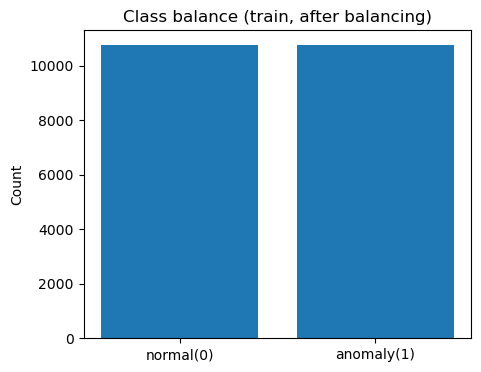

In [17]:
# 1) Class balance
unique, counts = np.unique(y_train_bal, return_counts=True)
print('Class counts:', dict(zip(unique, counts)))
plt.figure(figsize=(5,4))
plt.bar(['normal(0)','anomaly(1)'], [counts[0] if len(unique)>0 else 0, counts[1] if len(unique)>1 else 0])
plt.title('Class balance (train, after balancing)')
plt.ylabel('Count')
plt.show()

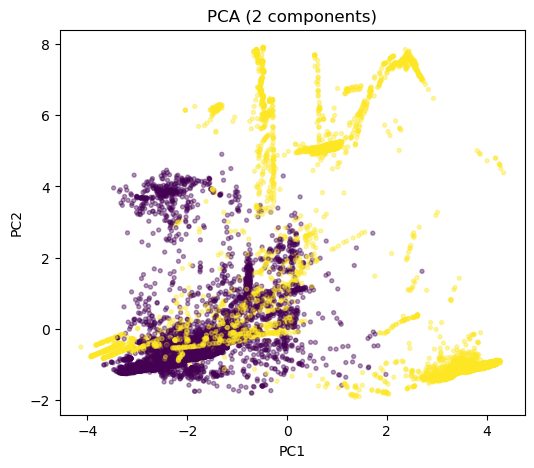

In [19]:
# 2) PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_bal if X_train_bal.shape[0] <= 200000 else X_train_bal[:200000])
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train_bal, alpha=0.4, s=8)
plt.title('PCA (2 components)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

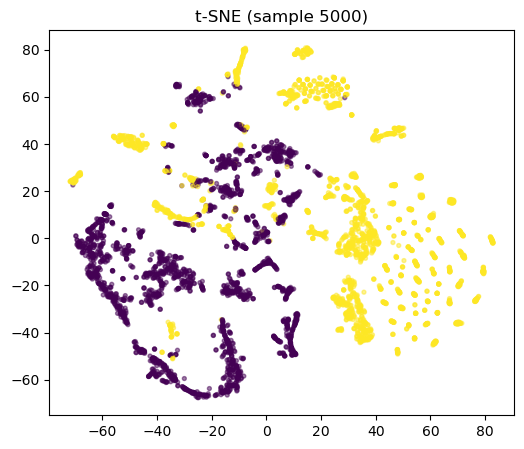

In [23]:
# 3) t-SNE (sampled up to 5000)
n_tsne = min(5000, X_train_bal.shape[0])
idx = np.random.RandomState(42).choice(X_train_bal.shape[0], size=n_tsne, replace=False)
X_tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', perplexity=30).fit_transform(X_train_bal[idx])
plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train_bal[idx], alpha=0.5, s=8)
plt.title(f't-SNE (sample {n_tsne})')
plt.show()

In [29]:
# 4) Correlation heatmap (sample up to 2000)
sample_n = min(2000, X_train_bal.shape[0])
idx2 = np.random.RandomState(1).choice(X_train_bal.shape[0], size=sample_n, replace=False)
df_sample = pd.DataFrame(X_train_bal[idx2], columns=feature_names)
corr = df_sample.corr().abs()

In [34]:
# print top correlated pairs
corr_unstack = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False)
print('\nTop 10 correlated feature pairs:')
for (a,b), val in corr_unstack.head(10).items():
    print(f"{val:.3f} {a}, {b}")


Top 10 correlated feature pairs:
1.000 feat_133, feat_134
1.000 feat_106, feat_140
1.000 feat_167, feat_201
1.000 feat_140, feat_174
1.000 feat_157, feat_164
1.000 feat_157, feat_187
1.000 feat_157, feat_213
1.000 feat_164, feat_187
1.000 feat_164, feat_213
1.000 feat_217, feat_218


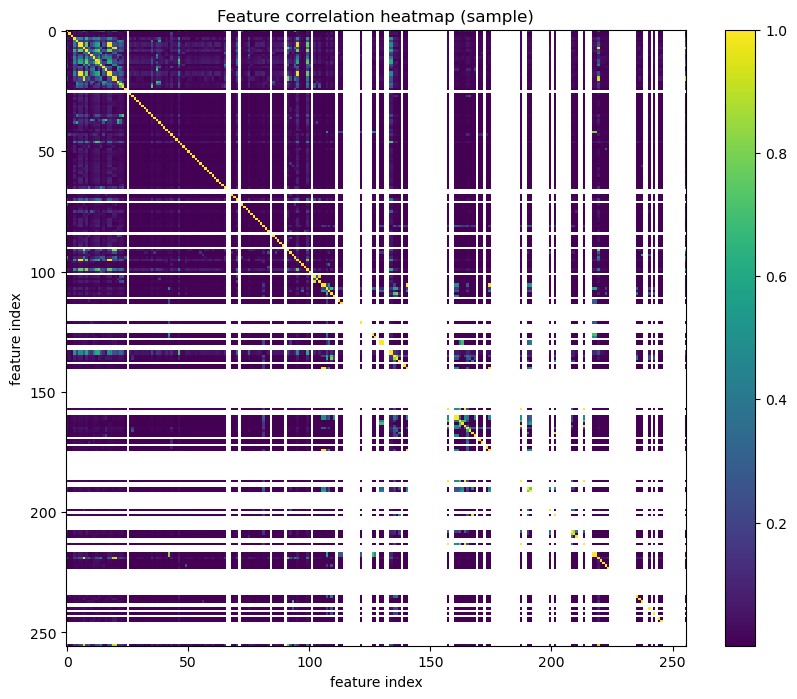

In [36]:
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title('Feature correlation heatmap (sample)')
plt.xlabel('feature index')
plt.ylabel('feature index')
plt.show()


Top 20 features:
feat_1: 0.10616
feat_2: 0.09495
feat_99: 0.06937
feat_8: 0.04716
feat_14: 0.04465
feat_12: 0.04263
feat_9: 0.04227
feat_133: 0.03933
feat_134: 0.03775
feat_13: 0.03725
feat_15: 0.03084
feat_3: 0.03013
feat_17: 0.02834
feat_18: 0.02754
feat_5: 0.02560
feat_6: 0.02341
feat_11: 0.02134
feat_16: 0.02060
feat_46: 0.01918
feat_95: 0.01686


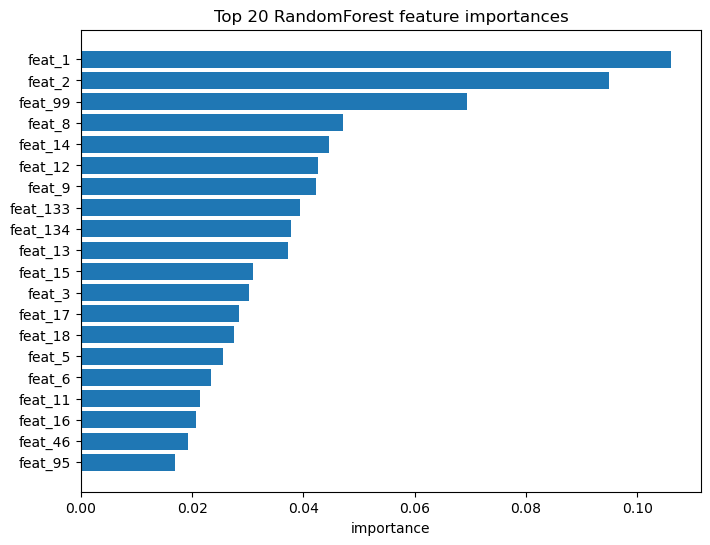

In [40]:
# 5) RandomForest importances
rf_samples = min(20000, X_train_bal.shape[0])
rf = RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)
rf.fit(X_train_bal[:rf_samples], y_train_bal[:rf_samples])
importances = rf.feature_importances_
idxs = np.argsort(importances)[-20:][::-1]
top_feats = [(feature_names[i], importances[i]) for i in idxs]
print('\nTop 20 features:')
for f, imp in top_feats:
    print(f"{f}: {imp:.5f}")


plt.figure(figsize=(8,6))
plt.barh(range(len(idxs)), [importances[i] for i in idxs])
plt.yticks(range(len(idxs)), [feature_names[i] for i in idxs])
plt.gca().invert_yaxis()
plt.title('Top 20 RandomForest feature importances')
plt.xlabel('importance')
plt.show()

In [44]:
# Save top features to file
import json
with open(os.path.join(PREP_DIR, 'top_features.json'), 'w') as f:
    json.dump({'top_features': [f for f,_ in top_feats]}, f)
print('Saved top_features.json')

Saved top_features.json
